### 感謝の定量化

In [1]:
# MeCabのインストール
# !apt install mecab libmecab-dev mecab-ipadic-utf8
# !pip install mecab-python3

In [2]:
# !echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

In [3]:
import pandas as pd
# import os
# from glob import glob
# import linecache
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # K-means クラスタリングをおこなう
#import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

dataset = pd.read_csv('text_data.csv', encoding="utf_8_sig")

In [4]:
# dataset = pd.read_csv('text_data.csv')
dataset = dataset['title']
dataset = pd.DataFrame(dataset)
dataset.head()

,title
0,芥川賞受賞の又吉「印税のほとんどは事務所に引かれてしまうため手元に残る金額は8万円」
1,華原朋美、「PON」の月曜レギュラーを降板か！？まったく空気読めない言動連発、現場から酷評噴出
2,片岡愛之助の公演に藤原紀香からピンクの胡蝶蘭が届く！ 花言葉は「愛しています」
3,池田エライザ、自撮りのコツを伝授 「上から撮るとかわいらしく映る」
4,片岡愛之助、紀香と交際し豹変…謙虚さ失い、報道陣をバカにしてケンカ売る発言を連発


In [5]:
import MeCab
# import subprocess
import re
# import torch

# tagger = MeCab.Tagger("-Owakati -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
tagger = MeCab.Tagger("-Owakati")
# mecabTagger = MeCab.Tagger("-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

In [6]:
#単語ベクトル作成
def make_wakati(sentence):
    # 半角全角英数字除去
    #print(sentence)
    sentence = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', "", sentence)
    #print(sentence)
    # 記号もろもろ除去
#     sentence = re.sub(r'[\．_－―─＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", sentence)
    #print(sentence)
    #スペース削除(スペースで変に区切られた単語があったため)
    sentence = sentence.replace(' ', '')
    # MeCabで分かち書き
    sentence = tagger.parse(sentence)
    print(sentence)
    
#     tagger.parse("")
    node = tagger.parseToNode(sentence)
    keywords = []
    while node:
        if node.feature.split(",")[0] == u"名詞":
            keywords.append(node.surface)
        elif node.feature.split(",")[0] == u"形容詞":
            keywords.append(node.feature.split(",")[6])
        elif node.feature.split(",")[0] == u"動詞":
            keywords.append(node.feature.split(",")[6])
        node = node.next
#     print(keywords)
    return keywords

In [7]:
# 単語ID辞書を作成する
word2index = {}
word_count = {}
for title in dataset["title"]:
    wakati = make_wakati(title)
    for word in wakati:
        if not word in word_count:
            word_count[word] = 0
        word_count[word] += 1
        if word in word2index: continue
        word2index[word] = len(word2index)
print("vocab size : ", len(word2index))

芥川賞 受賞 の 又吉 「 印税 の ほとんど は 事務所 に 引か れ て しまう ため 手元 に 残る 金額 は 万 円 」 

華原 朋美 、 「 」 の 月曜 レギュラー を 降板 か ！ ？ まったく 空気 読め ない 言動 連発 、 現場 から 酷評 噴出 

片岡 愛之助 の 公演 に 藤原 紀香 から ピンク の 胡蝶 蘭 が 届く ！ 花言葉 は 「 愛し て い ます 」 

池田 エライザ 、 自 撮り の コツ を 伝授 　 「 上 から 撮る と かわいらしく 映る 」 

片岡 愛之助 、 紀香 と 交際 し 豹変 … 謙虚 さ 失い 、 報道陣 を バカ に し て ケンカ 売る 発言 を 連発 

香取 慎吾 “ 自殺 発言 ” の 衝撃 ！ 　 『 家族 ノカタチ 』 終了 で 、 スケジュール 白紙 に !? 

田口 淳之介 の 闇 人脈 が 証明 さ れ た ！ ？ あの 大物 タニマチ と の 関係 し て い た こと が 明らか に 

ゲス 川谷 、 全国 ツアー で 不倫 騒動 を ネタ に 余裕 トーク 「 うどん 食べ たい けど 行け ない 」 

マツコ ・ デラックス 、 「 デブ 」 めぐる 親子 の 発言 に ショック を 受ける 

バカ リズム 、 一部 サッカー ファン に 「 『 ニッポン 』 連呼 で 日本 を 汚す な !」 

矢口 真里 、 不倫 し た ベッキー を 擁護 し 大 炎上 し て しまい 慌て て 発言 内容 を 否定 

高橋 みなみ に 批判 殺到 ！ 商法 批判 に 「 クソ 食らえ ！ 」 と 的外れ な 反論 

品川 祐 、 過去 の “ いじめ ” によって 共演 と なっ て いる 山里 亮太 に 謝罪 

不仲 を 自ら 暴露 ！ 山本 耕史 が 酒 に 逃げ て いる ？ 堀 北 真希 と の 夫婦 関係 が 明らか に 

テリー 伊藤 が 日本テレビ を クビ に なっ た 理由 が 判明 ！ サル を ぶっ 叩く 企画 に 抗議 殺到 

玉山 鉄二 、 ラブシーン の アドリブ で 思わず 素 ？ 　 「 濃密 な カ月 を 過ごす こと が でき まし た 」 

長澤 まさみ 、 ノブ コブ 吉 村 の デートプラン に 「 あり ！ 」 

水原 希子 「 私 は アメリカ 人 の ハーフ 」 　 母 は 韓国 人 で 日本人 の 血 は 一滴 も 入っ て い ない という 事 を 隠す 

完全 に ネタ 切れ か ？ ロンハー が 日テレ の 人気 企画 を 丸 パクリ に 批判 が 殺到 ！ 

メリー 喜多川 副 社長 が 勝利 宣言 ！ 「 は ジャ ニーズ で やる から 心配 ない 。 飯島 は 許さ ない 」 

キン コメ 今野 、 相方 逮捕 に びっくり 「 何 の こと です か ？ 」 最悪 解散 も … 

小池 徹 平 、 解散 の 真相 語る ！ ウエンツ 瑛 士 へ の “ 音楽 的 な 不満 ” 爆発 

韓国 軍 の 性的 暴力 訴え 朴 大統領 に 謝罪 要求 「 数 千 人 の ベトナム 人 女性 が 韓国 軍 兵士 から 性的 暴行 を 受け た 」 

「 歌謡 祭 」 昨年 上回る 視聴 率 ・ ％ ！ 　 瞬間 最高 は 中山 美穂 と の ・ ％ 

視聴 率 不振 に あえぐ フジテレビ が ついに パンドラ の 箱 に 手 を 出す ！- を 大晦日 に 放送 予定 

小出 恵 介 、 つん く ♂ イメージ の 役 を 演じる 　 カリスマ 性 を 演出 「 ストール も 巻い て い ます 」 

杏 、 突撃 取材 し て くる マスコミ に 不快 感 「 私 に 限ら ず 、 妊婦 へ の 突撃 取材 は やめ た 方 が いい 。 」 

松本 人志 、 親友 ・ 中居 に 忠告 「 絶対 解散 する な 」 「 泣き そう に なる 」 

荒川 静香 、 ファッションショー で 堂々 の ランウエー 　 羽生 結 弦 の 「 挑戦 し 続ける 姿 を 尊敬 する 」 

北斗 晶 、 抗 がん 剤 治療 の ため 再 入院 ！ 　 夫 ・ 健介 、 ブログ で 「 頑張れ ～」 

どんどん 不利 に なる 長瀬 智也 ！ 『 フラジャイル 』 ヒロイン 決定 に 「 武井 咲 なら 見 ない 」 の 声 

年間 起用 社 数 、 社 の 上戸 彩 が 年 ぶり 女王 ！ 　 男性 首位 は 相 葉 雅紀 

「 め ちゃ イケ 」 継続 も … 「 次 なる リストラ メンバー 」 と 噂 さ れる 人物 

人気 漫画 「 

In [8]:
# word_count

In [9]:
word_counts = sorted(word_count.items(), key=lambda x:x[1], reverse=True)
word_counts

[('する', 269),
 ('れる', 108),
 ('いる', 98),
 ('ベッキー', 89),
 ('者', 63),
 ('不倫', 55),
 ('結婚', 54),
 ('なる', 52),
 ('の', 49),
 ('人', 48),
 ('批判', 45),
 ('視聴', 42),
 ('川谷', 40),
 ('ない', 38),
 ('こと', 37),
 ('声', 35),
 ('殺到', 34),
 ('年', 34),
 ('中', 32),
 ('率', 32),
 ('主演', 32),
 ('明かす', 31),
 ('関係', 30),
 ('ゲス', 30),
 ('騒動', 30),
 ('ファン', 28),
 ('暴露', 27),
 ('清原', 27),
 ('女性', 27),
 ('事務所', 26),
 ('ドラマ', 26),
 ('謝罪', 25),
 ('出演', 25),
 ('妻', 25),
 ('疑惑', 25),
 ('中居', 24),
 ('さん', 24),
 ('ある', 23),
 ('紅白', 23),
 ('絵', 23),
 ('すぎる', 23),
 ('逮捕', 23),
 ('ジャ', 23),
 ('ニーズ', 23),
 ('氏', 23),
 ('理由', 22),
 ('番組', 22),
 ('音', 22),
 ('発覚', 22),
 ('木村', 21),
 ('後', 21),
 ('ら', 21),
 ('メンバー', 21),
 ('紗', 21),
 ('できる', 20),
 ('られる', 20),
 ('せる', 20),
 ('交際', 19),
 ('さ', 19),
 ('アナ', 19),
 ('嵐', 19),
 ('噂', 19),
 ('告白', 19),
 ('てる', 19),
 ('報道', 19),
 ('出る', 18),
 ('語る', 18),
 ('激怒', 18),
 ('役', 18),
 ('加藤', 18),
 ('芸能', 17),
 ('狩野', 17),
 ('日', 17),
 ('熱愛', 17),
 ('見る', 16),
 ('離婚', 16),
 ('自分', 16),
 ('愛

In [10]:
word = []
for i in word_counts:
        word.append(i[0])

In [11]:
word = pd.DataFrame(word)
word

,0
0,する
1,れる
2,いる
3,ベッキー
4,者
...,...
4366,トーン
4367,最新
4368,オリコン
4369,位記


In [12]:
# テスト
test = "この間の業務手伝っていただき、ありがとうございました！！\n本日はお疲れ様です。良い成果が出せそうです。"
print(make_wakati(test))

この間 の 業務 手伝っ て いただき 、 ありがとう ござい まし た ！ ！ 本日 は お 疲れ 様 です 。 良い 成果 が 出せ そう です 。 

['この間', '業務', '手伝う', 'いただく', '本日', '疲れ', '様', '良い', '成果', '出せる', 'そう']


---

In [13]:
# !pip install gensim
#https://qiita.com/Hironsan/items/8f7d35f0a36e0f99752c

In [14]:
import gensim
# model = gensim.models.Word2Vec.load('ja/ja.bin') #Word2Vec
# model = gensim.models.KeyedVectors.load_word2vec_format('ja/ja.bin', binary=True) #Word2Vec
model = gensim.models.KeyedVectors.load_word2vec_format('model.vec', binary=False) #FastText

In [15]:
model.most_similar("感謝", topn=100)

[('喜び', 0.6260571479797363),
 ('心から', 0.6176725625991821),
 ('謝意', 0.6161894798278809),
 ('敬意', 0.6047272682189941),
 ('お礼', 0.5940001010894775),
 ('激励', 0.590952455997467),
 ('感激', 0.5859252214431763),
 ('気持ち', 0.5812628269195557),
 ('ありがとう', 0.5769902467727661),
 ('皆さま', 0.5740945935249329),
 ('感動', 0.5735066533088684),
 ('祝福', 0.5732262134552002),
 ('励まし', 0.5623573064804077),
 ('喜ん', 0.558277428150177),
 ('心より', 0.5568754076957703),
 ('哀悼', 0.556130588054657),
 ('くださっ', 0.5553799271583557),
 ('恩返し', 0.5552031397819519),
 ('下さっ', 0.5551738739013672),
 ('祈る', 0.5526976585388184),
 ('捧げ', 0.5491489171981812),
 ('くださる', 0.5487790107727051),
 ('本当にありがとうございました', 0.5485208034515381),
 ('お母様', 0.5464757680892944),
 ('思い', 0.5463429689407349),
 ('祈念', 0.5442900657653809),
 ('込め', 0.5438355207443237),
 ('申し上げ', 0.5436174869537354),
 ('祈っ', 0.5434809923171997),
 ('追悼', 0.5431604385375977),
 ('願っ', 0.5415921807289124),
 ('熱い思い', 0.5402973890304565),
 ('願う', 0.5402470827102661),
 ('祈り', 0.53884

In [16]:
# model['感謝']
model.most_similar(positive=['日本人'])

[('韓国人', 0.7338134050369263),
 ('中国人', 0.717720627784729),
 ('アメリカ人', 0.6725355386734009),
 ('日本人女性', 0.6723321676254272),
 ('外国人', 0.642046332359314),
 ('フィリピン人', 0.6264426708221436),
 ('欧米人', 0.6217868328094482),
 ('アジア人', 0.6192302703857422),
 ('台湾人', 0.6034690141677856),
 ('日系人', 0.5906497240066528)]

In [17]:
sample = ["賞賛", "応援", "労い", "尊敬", "挨拶", "同意", "自己便益", "願い", "依頼", "指示", "共感", "鼓舞", "喜び", "祈り", "詫び", "雑談"]
data = []
for type_ in sample:
    try:
        tmp = model.most_similar(positive=type_)
        data.append(tmp)
    except:
        print('word’' + type_ + '’not in vocabulary')
        A = type_
sample.remove(A)
print(sample)

word’自己便益’not in vocabulary
['賞賛', '応援', '労い', '尊敬', '挨拶', '同意', '願い', '依頼', '指示', '共感', '鼓舞', '喜び', '祈り', '詫び', '雑談']


In [18]:
# data

In [19]:
data = pd.DataFrame(data, index=sample)
data = data.T

In [20]:
data

,賞賛,応援,労い,尊敬,挨拶,同意,願い,依頼,指示,共感,鼓舞,喜び,祈り,詫び,雑談
0,"(称賛, 0.8758201599121094)","(応援団, 0.6823321580886841)","(ねぎらい, 0.617759108543396)","(敬愛, 0.7310981154441833)","(あいさつ, 0.7708175182342529)","(承諾, 0.7093747854232788)","(願っ, 0.757114052772522)","(頼ま, 0.6608020067214966)","(命令, 0.657062828540802)","(親近感, 0.6171678304672241)","(士気, 0.6211110353469849)","(喜ん, 0.7070636749267578)","(祈る, 0.7169433832168579)","(詫びる, 0.6516720652580261)","(会話, 0.5758863687515259)"
1,"(絶賛, 0.7380796670913696)","(応援歌, 0.5667240023612976)","(ねぎらう, 0.6052253246307373)","(敬意, 0.669126570224762)","(ご挨拶, 0.5933835506439209)","(了承, 0.6695442795753479)","(願う, 0.7452517747879028)","(要請, 0.6131413578987122)","(指令, 0.5473251342773438)","(感情, 0.596405029296875)","(奮い立た, 0.5846611261367798)","(喜ぶ, 0.6653314232826233)","(捧げる, 0.6746728420257568)","(謝罪, 0.6201756000518799)","(世間話, 0.5678499937057495)"
2,"(賛辞, 0.6888724565505981)","(応援団長, 0.541817307472229)","(ねぎらわ, 0.533714771270752)","(賞賛, 0.6277339458465576)","(新年の挨拶, 0.5791879892349243)","(合意, 0.6416131258010864)","(叶え, 0.708531379699707)","(引き受け, 0.599562406539917)","(命じ, 0.5420212745666504)","(同情, 0.5840601921081543)","(激励, 0.569572925567627)","(歓喜, 0.6540846824645996)","(祈っ, 0.6557257771492004)","(謝っ, 0.595147967338562)","(談義, 0.5427384972572327)"
3,"(褒め, 0.6615880727767944)","(サポーター, 0.5383031368255615)","(ねぎらっ, 0.5245795249938965)","(人柄, 0.6188326478004456)","(拍手, 0.5666038990020752)","(了解, 0.6381179094314575)","(叶える, 0.6832717657089233)","(快諾, 0.5869093537330627)","(待機命令, 0.541455864906311)","(尊敬, 0.5660059452056885)","(高揚, 0.5626145601272583)","(驚き, 0.6459325551986694)","(捧げ, 0.6397427320480347)","(激怒, 0.5917230844497681)","(内輪ネタ, 0.4905930161476135)"
4,"(尊敬, 0.6277340650558472)","(がんばろう, 0.5364265441894531)","(労う, 0.5175854563713074)","(称賛, 0.6175302863121033)","(よろしくお願いします, 0.5635450482368469)","(承認, 0.6189716458320618)","(叶う, 0.6427521705627441)","(頼ん, 0.5855815410614014)","(要請, 0.5322249531745911)","(感動, 0.5554643273353577)","(愛国心, 0.5339468717575073)","(悲しみ, 0.6435604095458984)","(祈祷, 0.636040210723877)","(非礼, 0.5887055397033691)","(飲み会, 0.4794546365737915)"
5,"(評し, 0.6254720091819763)","(全力応援, 0.5290887951850891)","(激励, 0.5153719186782837)","(慕っ, 0.6097602844238281)","(お疲れさま, 0.5571840405464172)","(拒絶, 0.601908802986145)","(想い, 0.6147809624671936)","(申し出, 0.5685433745384216)","(命じる, 0.5291622877120972)","(心情, 0.5494885444641113)","(叱咤, 0.5288562774658203)","(感動, 0.6360564231872559)","(礼拝, 0.6317447423934937)","(申し訳な, 0.5779212117195129)","(話, 0.47583115100860596)"
6,"(高い評価, 0.6185067892074585)","(声援, 0.527733325958252)","(励まし, 0.5138002038002014)","(心酔, 0.6058896780014038)","(祝辞, 0.5566996932029724)","(賛成, 0.6014900803565979)","(聞き届け, 0.6050291061401367)","(頼み, 0.5668511986732483)","(従わ, 0.5135115385055542)","(好意, 0.547883152961731)","(団結, 0.4983225464820862)","(嬉し, 0.6308411955833435)","(聖なる, 0.6033302545547485)","(懇願, 0.574499249458313)","(話し込ん, 0.47241610288619995)"
7,"(激賞, 0.613785445690155)","(六甲おろし, 0.527489423751831)","(挨拶, 0.5039975643157959)","(慕わ, 0.5991255044937134)","(最後の挨拶, 0.5536990165710449)","(拒否, 0.5996518731117249)","(願い事, 0.6008279323577881)","(舞い込む, 0.5567319989204407)","(厳命, 0.5096352696418762)","(理解, 0.5453704595565796)","(称賛, 0.49788960814476013)","(感激, 0.6277530789375305)","(お祈り, 0.6028725504875183)","(言付け, 0.5733970403671265)","(やり取り, 0.46040013432502747)"
8,"(称え, 0.6094597578048706)","(応援合戦, 0.5261664986610413)","(慰労, 0.5008108615875244)","(親交, 0.5869675278663635)","(お辞儀, 0.5478978157043457)","(申し出, 0.5869439840316772)","(懇願, 0.5893115997314453)","(打診, 0.5528178215026855)","(助言, 0.5088523030281067)","(シンパシー, 0.544873058795929)","(励まし, 0.49689173698425293)","(感謝, 0.6260571479797363)","(ささげる, 0.5980609655380249)","(諭し, 0.5667544603347778)","(井戸端会議, 0.45968782901763916)"
9,"(評さ, 0.609194278717041)","(応援ソング, 0.525647759437561)","(感謝, 0.49625539779663086)","(憧れ, 0.5833450555801392)","(ごきげんよう, 0.5402970910072327)","(提案, 0.5829447507858276)","(ほしい, 0.5862970352172852)","(請ける, 0.54940319

In [21]:
posi_list = ['優れる', '良い','喜ぶ','褒める', 'めでたい','賢い','善い', '適す','天晴',
 '祝う', '功績','賞','嬉しい','喜び','才知','徳', '才能','素晴らしい','芳しい','称える',
 '適切','崇める','助ける','抜きんでる','清水','雄雄しい','仕合せ','幸い','吉兆','秀でる']

nega_list = ['悪い', '死ぬ', '病気', '酷い', '罵る', '浸ける', '卑しい',
 '下手', '苦しむ', '苦しい', '付く', '厳しい', '難しい', '殺す', '難い', '荒荒しい',
 '惨い', '責める', '敵', '背く', '嘲る', '苦しめる', '辛い', '物寂しい', '罰', '不貞腐る',
 '寒い', '下らない', '残念']

In [22]:
def posi_nega_score(x):
    #ポジティブ度合いの判定
    posi = []
    for i in posi_list:
        try:
            n = model.similarity(i, x)
            posi.append(n)
        except:
            continue
    try:
        posi_mean = sum(posi)/len(posi)
    except:
        posi_mean = 0

    #ネガティブ度合いの判定
    nega = []
    for i in nega_list:
        try:
            n = model.similarity(i, x)
            nega.append(n)
        except:
            continue
    try:
        nega_mean = sum(nega)/len(nega)
    except:
        nega_mean = 0
    if posi_mean > nega_mean:
        return posi_mean
    if nega_mean > posi_mean:
        return -nega_mean
    else:
        return 0

In [23]:
ddf = pd.read_csv('dataset.csv')
ddf

,title,category
0,ワイヤレス・テクノジー・パーク2012：NTTブースにて「災害対策用小型衛星通信基地局」を出展\n,smax
1,【Sports Watch】ザッケローニ新監督、イタリア記者の評価は？\n,sports-watch
2,クリスタル ケイがハリウッド大作アニメの吹き替え担当に！世界進出の足がかりとなるか\n,movie-enter
3,ソフトバンク、Vision 007HWに不具合でソフトウェア更新を提供開始\n,smax
4,オトナ女子たちの圧倒的支持をうけ、ドラマ10『はつ恋』の一挙再放送が決定！\n,dokujo-tsushin
...,...,...
7371,これでぐっすり！早く眠れる睡眠導入アプリ 【iPhoneでチャンスを掴め】\n,it-life-hack
7372,インタビュー：公認会計士・平林亮子「駄目ならしょうがないよねっていう潔さも必要」\n,peachy
7373,給湯室で抹茶を楽しむ『給湯流茶道』とは？\n,dokujo-tsushin
7374,湿気に負けない！ 梅雨の「楽カワ」ヘアアレンジ\n,peachy


In [24]:
#各単語にスコアを割り振る
word['スコア'] = word[0].apply(lambda x : posi_nega_score(x))

import numpy as np
#与えられたスコアを-1から1の範囲に調整
score = np.array(word['スコア'])
score_std = (score - score.min())/(score.max() - score.min())
score_scaled = score_std * (1 - (-1)) + (-1)
word['スコア'] = score_scaled

In [25]:
nega = word.sort_values('スコア').head(50)

In [26]:
posi = word.sort_values('スコア', ascending=False).head(50)

In [27]:
posi

,0,スコア
3106,喜び,1.000000
1645,素晴らしい,0.993487
2050,賞賛,0.979438
1479,喜ぶ,0.969622
3150,称賛,0.957266
4279,良い,0.925545
2562,褒める,0.921252
414,感謝,0.893400
1837,謙虚,0.893173
3961,勇気,0.889358


In [28]:
nega

,0,スコア
4250,ひどい,-1.000000
837,嫌,-0.952061
2765,辛い,-0.951339
1405,殺す,-0.947446
187,悪い,-0.943589
3248,しでかす,-0.937780
94,思う,-0.916998
3119,馬鹿,-0.913170
76,自分,-0.908048
3821,苦しむ,-0.906390


---

In [29]:
value = np.random.rand(100, 5)
# factor = ['label5', 'label10']
dataset = pd.DataFrame(value, columns=['label' + str(i) for i in range(1, 6)])
dataset['label5'] = np.random.normal(0.5, 0.5, 100)
# dataset['label10'] = np.random.normal(0.5, 0.5, 100)
print(dataset.shape)
df = dataset.head(100)
df.head()

(100, 5)


,label1,label2,label3,label4,label5
0,0.989320,0.154716,0.527422,0.321479,0.654539
1,0.021628,0.521715,0.006628,0.782633,1.001195
2,0.851159,0.126055,0.465914,0.479778,0.050351
3,0.997668,0.573367,0.528369,0.567302,0.257307
4,0.571954,0.979448,0.268832,0.096911,-0.542441


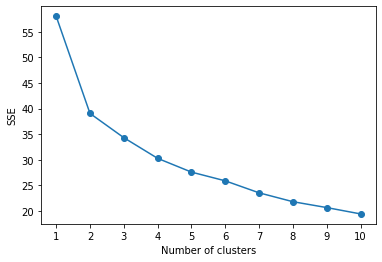

In [30]:
# SSEの算出
SSE=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,
               init='k-means++',
               n_init=5,
               max_iter=10,
               random_state=0)
    model.fit(df)
    SSE.append(model.inertia_)

# グラフの描画
plt.plot(range(1,11), SSE, marker='o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [31]:
# この例では 3 つのグループに分割
kmeans_model = KMeans(n_clusters=3, random_state=10).fit(df.iloc[:, 1:])

In [32]:
labels = kmeans_model.labels_

In [33]:
labels

array([1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1], dtype=int32)

In [34]:
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels]

In [35]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
PCA(copy=True, n_components=None, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 1:])

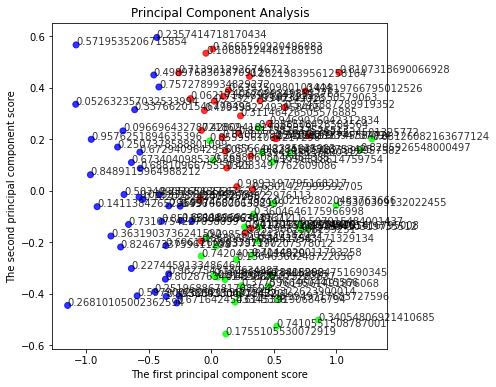

In [38]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.iloc[:, 0]):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()